1.2 Обязательная ссылка на все таблицы данных. Описание данных, с указанием их источника.
(Какие данные взяты, из какого раздела, что фактически означают, количество данных, в чем
измеряются и т.п.).

https://www.fao.org/faostat/ru/#data/MK?countries=185&elements=61550,61810,6129,61290,61820,6182,61890,6163,61570,61860,6103,6187,61900,6143,6224,6225,6110,6119,6185,6179&items=22008,22015,22011,22073,22071,22010,22016,22077,22076,22078,22075&years=1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024&output_type=table&file_type=csv&submit=true

Для выполнения данного исследования был использован массив статистических данных, загруженный с портала FAOSTAT Продовольственной и сельскохозяйственной организации Объединенных Наций. Конкретно данные получены из раздела «Макроэкономические показатели», содержащего агрегированные национальные счета. Исходный набор включает множество показателей для Российской Федерации за продолжительный период, однако для формирования четкого временного ряда была проведена фильтрация. В качестве основы для анализа выбран ряд, отражающий динамику валового внутреннего продукта (Gross Domestic Product) в млн. долларах США.

1.3 Формальное представление исследуемых данных (таблицей, если данных слишком много, то
обрезать – оставить начало/конец – уже подготовленных).

1.4 Наглядное представление данных (в виде гистограммы, столбчатой или круговой диаграммы с
подписями осей, легендой и словесным описанием).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

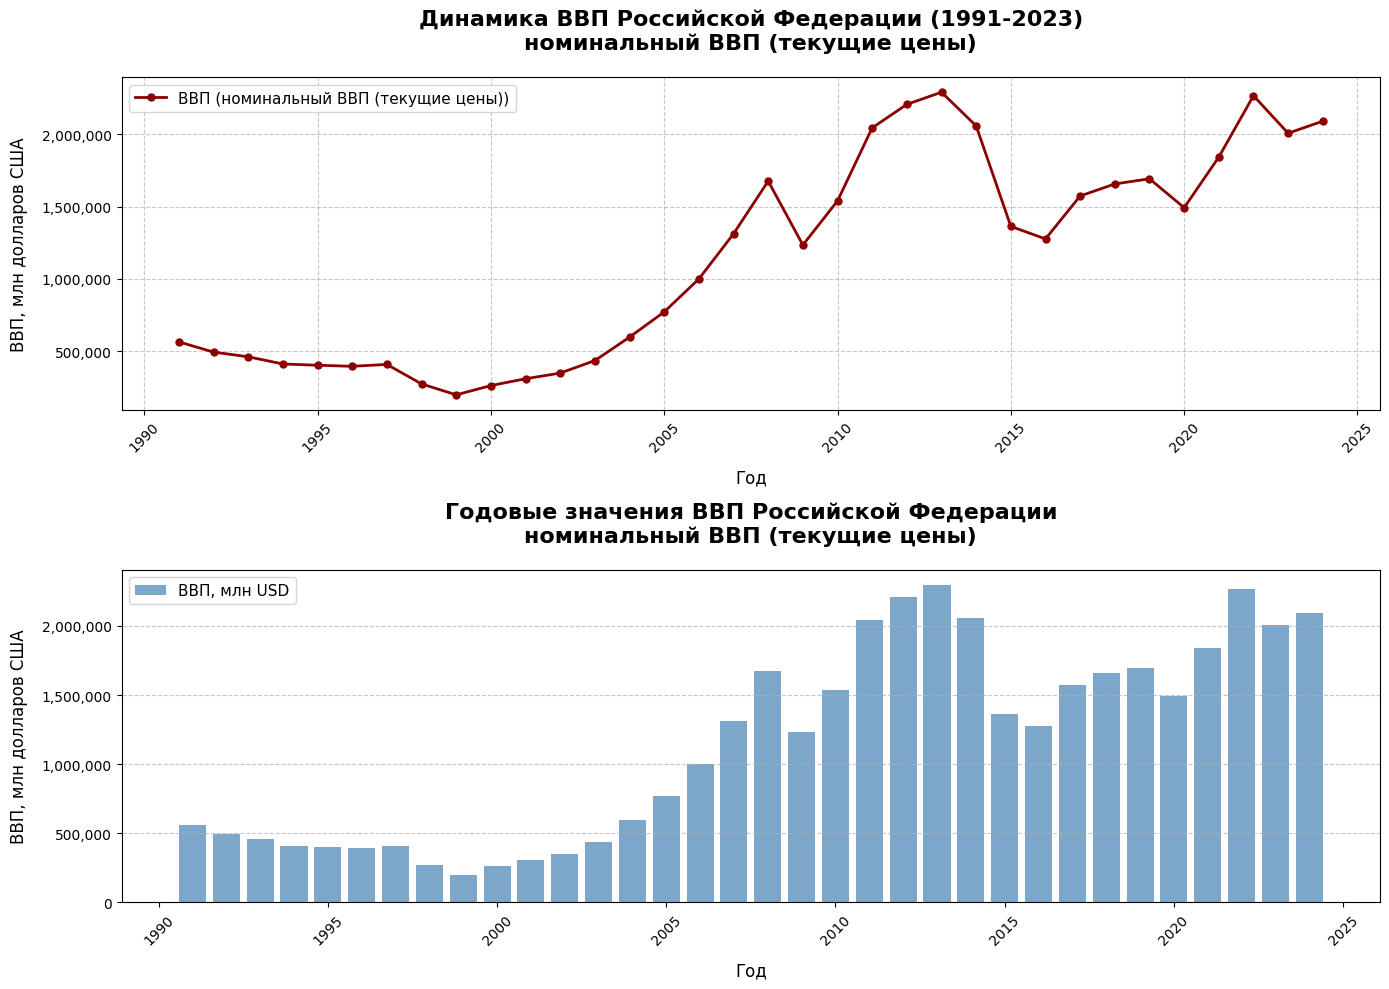


ДЕТАЛИЗИРОВАННЫЙ АНАЛИЗ ПИКОВЫХ ЗНАЧЕНИЙ:
Абсолютный максимум ВВП за весь период достигнут в 2013 году.
Значение ВВП в 2013 году: 2,292,470 млн долларов США.
Значение ВВП в 2024 году: 2,092,052 млн долларов США.
Таким образом, значение ВВП в 2024 году ниже пикового на 200,419 млн $ (8.7%).

ТОП-5 лет с наибольшими значениями ВВП:
2013 год: 2,292,470 млн $
2022 год: 2,268,388 млн $
2012 год: 2,208,294 млн $
2024 год: 2,092,052 млн $
2014 год: 2,059,242 млн $


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#загрузка данных из csv файла
file_path = 'FAOSTAT_data_ru_12-16-2025.csv'
df = pd.read_csv(file_path, encoding='utf-8')

#определение выбранного элемента для анализа
#вариант 1: номинальный ввп в текущих ценах
chosen_element = 'Value US$'
#вариант 2: реальный ввп в постоянных ценах (если доступен)
#chosen_element = 'Value US$, 2015 prices'

#фильтрация данных для выбранного ряда
filtered_df = df[
    (df['Зона'] == 'Российская Федерация') &
    (df['Позиция'] == 'Gross Domestic Product') &
    (df['Элемент'] == chosen_element)
].copy()

#сортировка по году и преобразование типов
filtered_df['Год'] = pd.to_numeric(filtered_df['Год'], errors='coerce')
filtered_df['Значение'] = pd.to_numeric(filtered_df['Значение'], errors='coerce')
filtered_df = filtered_df.sort_values('Год').reset_index(drop=True)

#определение названия ряда для подписей графиков
if chosen_element == 'Value US$':
    data_type = 'номинальный ВВП (текущие цены)'
elif chosen_element == 'Value US$, 2015 prices':
    data_type = 'реальный ВВП (постоянные цены 2015 г.)'
else:
    data_type = chosen_element

#создание составного графика: линейный + столбчатая диаграмма
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

#1. линейный график для отображения тренда
axes[0].plot(filtered_df['Год'], filtered_df['Значение'], 
             marker='o', linewidth=2, markersize=5, color='darkred')
axes[0].set_title(f'Динамика ВВП Российской Федерации (1991-2023)\n{data_type}', 
                  fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('Год', fontsize=12, labelpad=10)
axes[0].set_ylabel('ВВП, млн долларов США', fontsize=12, labelpad=10)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend([f'ВВП ({data_type})'], loc='upper left', fontsize=11)

#2. столбчатая диаграмма (гистограмма) для сравнения годовых значений
bars = axes[1].bar(filtered_df['Год'], filtered_df['Значение'], 
                   color='steelblue', alpha=0.7)
axes[1].set_title(f'Годовые значения ВВП Российской Федерации\n{data_type}', 
                  fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel('Год', fontsize=12, labelpad=10)
axes[1].set_ylabel('ВВП, млн долларов США', fontsize=12, labelpad=10)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(['ВВП, млн USD'], loc='upper left', fontsize=11)

#добавление числовых значений на столбцы (по желанию)
#for bar in bars:
#    height = bar.get_height()
#    axes[1].text(bar.get_x() + bar.get_width()/2., height + 10000,
#                f'{int(height):,}'.replace(',', ' '),
#                ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

#дополнение к предыдущему коду для вывода года с максимальным значением ввп
#после построения графиков и вывода статистик добавить:

#нахождение года с максимальным значением ввп
max_gdp_row = filtered_df.loc[filtered_df['Значение'].idxmax()]
max_year = int(max_gdp_row['Год'])
max_value = max_gdp_row['Значение']

#нахождение значения за 2024 год (последний год в данных)
gdp_2024_row = filtered_df[filtered_df['Год'] == 2024]
if not gdp_2024_row.empty:
    gdp_2024_value = gdp_2024_row['Значение'].values[0]
else:
    gdp_2024_value = None

#вывод результатов
print(f"\nДЕТАЛИЗИРОВАННЫЙ АНАЛИЗ ПИКОВЫХ ЗНАЧЕНИЙ:")
print(f"Абсолютный максимум ВВП за весь период достигнут в {max_year} году.")
print(f"Значение ВВП в {max_year} году: {max_value:,.0f} млн долларов США.")

if gdp_2024_value:
    print(f"Значение ВВП в 2024 году: {gdp_2024_value:,.0f} млн долларов США.")
    difference = gdp_2024_value - max_value
    if difference < 0:
        print(f"Таким образом, значение ВВП в 2024 году ниже пикового на {abs(difference):,.0f} млн $ ({abs(difference)/max_value*100:.1f}%).")
    elif difference > 0:
        print(f"Таким образом, значение ВВП в 2024 году превышает предыдущий пик на {difference:,.0f} млн $ ({difference/max_value*100:.1f}%).")
    else:
        print("Значения в пиковом году и в 2024 году равны.")

#дополнительный анализ: ранжирование по убыванию для вывода топ-5 лет
print(f"\nТОП-5 лет с наибольшими значениями ВВП:")
top_5_years = filtered_df.nlargest(5, 'Значение')[['Год', 'Значение']]
for i, row in top_5_years.iterrows():
    print(f"{int(row['Год'])} год: {row['Значение']:,.0f} млн $")


Анализ пиковых значений временного ряда номинального ВВП России позволяет сделать важные выводы о динамике экономического развития за рассматриваемый период. Абсолютный максимум показателя был зафиксирован в 2013 году, когда ВВП достиг уровня в 2.29 триллиона долларов США. Последующие годы, за исключением кратковременных колебаний, не смогли превзойти этот рубеж, что указывает на наличие перелома в траектории роста экономики после 2013 года.

Особенно показательно сравнение с последним доступным годом наблюдений. В 2024 году значение ВВП составило 2.09 триллиона долларов, что на 200 миллиардов долларов, или на 8.7%, ниже пикового значения десятилетней давности. Этот разрыв демонстрирует, что в номинальном долларовом выражении экономика России к концу анализируемого периода все еще не восстановила уровень, достигнутый более десяти лет назад (если судить относительно доллара США). Ранжирование топ-5 лет, где 2013, 2022 и 2012 годы занимают первые три позиции, а 2024 год — лишь четвертую, дополнительно подтверждает, что текущие экономические показатели в стоимостном выражении остаются ниже докризисных максимумов, сформировавшихся в начале 2010-х годов.

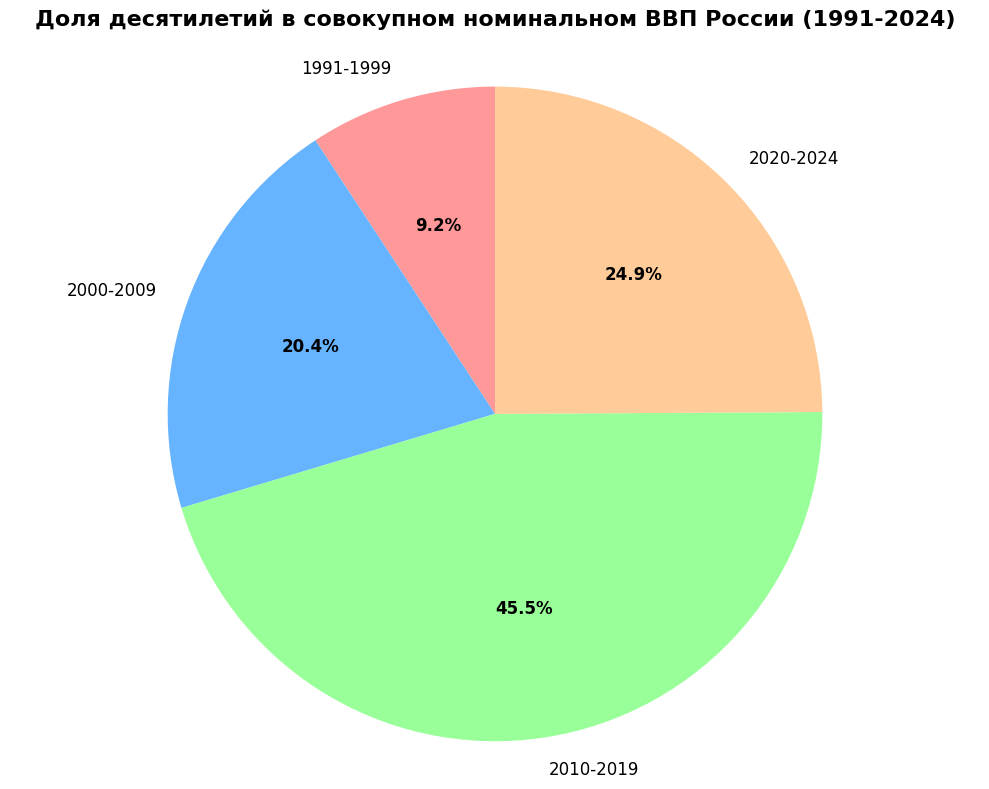

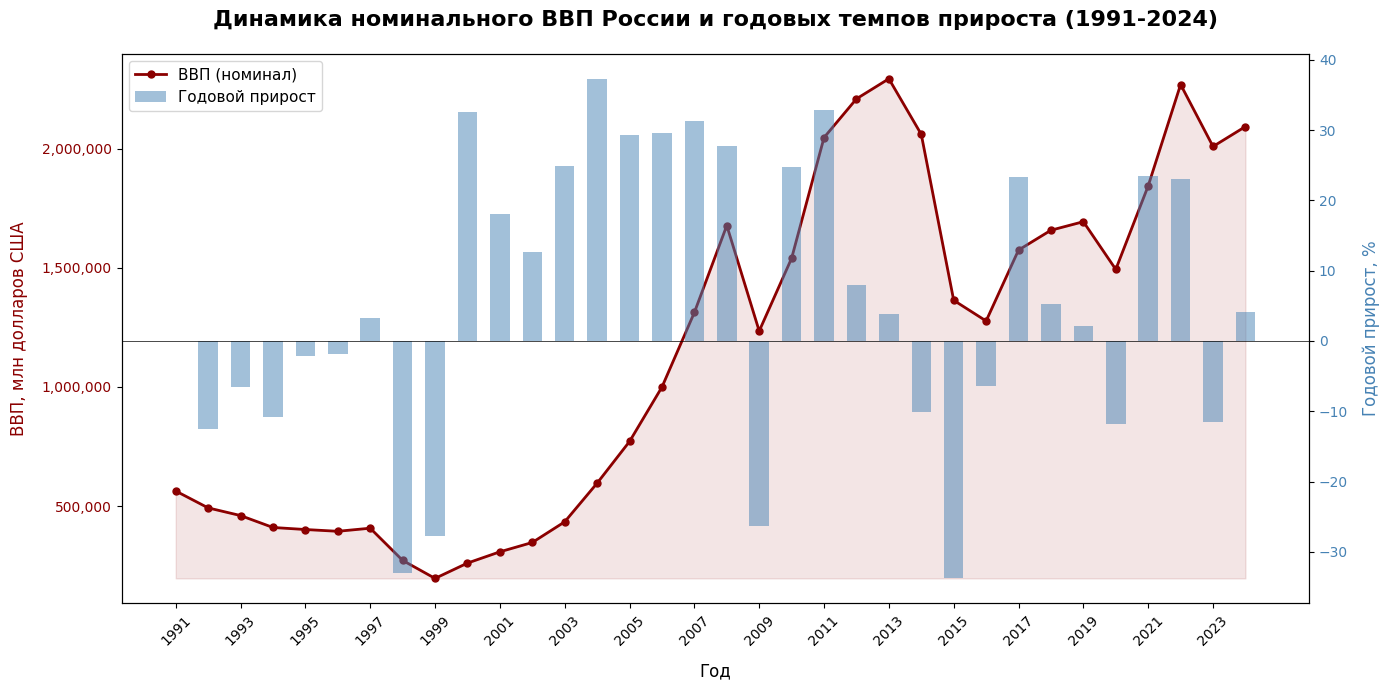

NameError: name 'np' is not defined

<Figure size 1200x800 with 0 Axes>

In [3]:

#загрузка отфильтрованного временного ряда
filtered_df = pd.read_csv('filtered_gdp_series.csv')

#дополнительная визуализация 1: круговая диаграмма вклада десятилетий в совокупный ввп
def assign_decade(year):
    if 1991 <= year <= 1999:
        return '1991-1999'
    elif 2000 <= year <= 2009:
        return '2000-2009'
    elif 2010 <= year <= 2019:
        return '2010-2019'
    else:
        return '2020-2024'

filtered_df['Десятилетие'] = filtered_df['Год'].apply(assign_decade)
decade_totals = filtered_df.groupby('Десятилетие')['Значение'].sum()

plt.figure(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
wedges, texts, autotexts = plt.pie(
    decade_totals.values, 
    labels=decade_totals.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Доля десятилетий в совокупном номинальном ВВП России (1991-2024)', 
          fontsize=16, fontweight='bold', pad=20)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

#дополнительная визуализация 2: совмещенный график ввп и годовых приростов
fig, ax1 = plt.subplots(figsize=(14, 7))

#ось y слева: абсолютное значение ввп
color_line = 'darkred'
ax1.set_xlabel('Год', fontsize=12, labelpad=10)
ax1.set_ylabel('ВВП, млн долларов США', fontsize=12, labelpad=10, color=color_line)
line1 = ax1.plot(filtered_df['Год'], filtered_df['Значение'], color=color_line, 
                 linewidth=2, marker='o', markersize=5, label='ВВП (номинал)')
ax1.tick_params(axis='y', labelcolor=color_line)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

#выделение области между линией тренда и фактическими значениями
ax1.fill_between(filtered_df['Год'], filtered_df['Значение'], 
                 filtered_df['Значение'].min(), alpha=0.1, color=color_line)

#ось y справа: годовой прирост в %
ax2 = ax1.twinx()
yearly_growth = filtered_df['Значение'].pct_change() * 100
color_bars = 'steelblue'
ax2.set_ylabel('Годовой прирост, %', fontsize=12, labelpad=10, color=color_bars)
bars = ax2.bar(filtered_df['Год'], yearly_growth, color=color_bars, alpha=0.5, 
               width=0.6, label='Годовой прирост')
ax2.tick_params(axis='y', labelcolor=color_bars)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

#объединение легенд
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

plt.title('Динамика номинального ВВП России и годовых темпов прироста (1991-2024)', 
          fontsize=16, fontweight='bold', pad=20)
ax1.set_xticks(filtered_df['Год'][::2])
ax1.tick_params(axis='x', rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#дополнительная визуализация 3: горизонтальная столбчатая диаграмма топ-10 лет по ввп
top_10_years = filtered_df.nlargest(10, 'Значение').sort_values('Значение', ascending=True)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_years['Год'].astype(str), top_10_years['Значение'], 
                color=plt.cm.viridis(np.linspace(0.3, 0.9, 10)))
plt.xlabel('ВВП, млн долларов США', fontsize=12, labelpad=10)
plt.title('Топ-10 лет с наибольшими значениями номинального ВВП России', 
          fontsize=16, fontweight='bold', pad=20)

#добавление значений на столбцы
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10000, bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}'.replace(',', ' '), 
             ha='left', va='center', fontsize=10)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#расчет и вывод дополнительной статистики по десятилетиям
print("АНАЛИЗ ПО ДЕСЯТИЛЕТИЯМ:")
for decade, total in decade_totals.items():
    share = total / decade_totals.sum() * 100
    print(f"{decade}: {total:,.0f} млн $ ({share:.1f}% от общего объема)")

1.5 Проверить ряд на стационарность (найти оценку серийных автокорреляций, построить
коррелограмму).

Коэффициент автокорреляции r_1 = 0.9044
Коэффициент автокорреляции r_2 = 0.7887
Коэффициент автокорреляции r_3 = 0.6802
Коэффициент автокорреляции r_4 = 0.5949
Коэффициент автокорреляции r_5 = 0.5313
Коэффициент автокорреляции r_6 = 0.4365
Коэффициент автокорреляции r_7 = 0.3301
Коэффициент автокорреляции r_8 = 0.2447
Коэффициент автокорреляции r_9 = 0.1898
Коэффициент автокорреляции r_10 = 0.1436
Коэффициент автокорреляции r_11 = 0.0546
Коэффициент автокорреляции r_12 = -0.0691

Критерий Дарбина-Уотсона: d = 0.0328
Интерпретация: сильная положительная автокорреляция


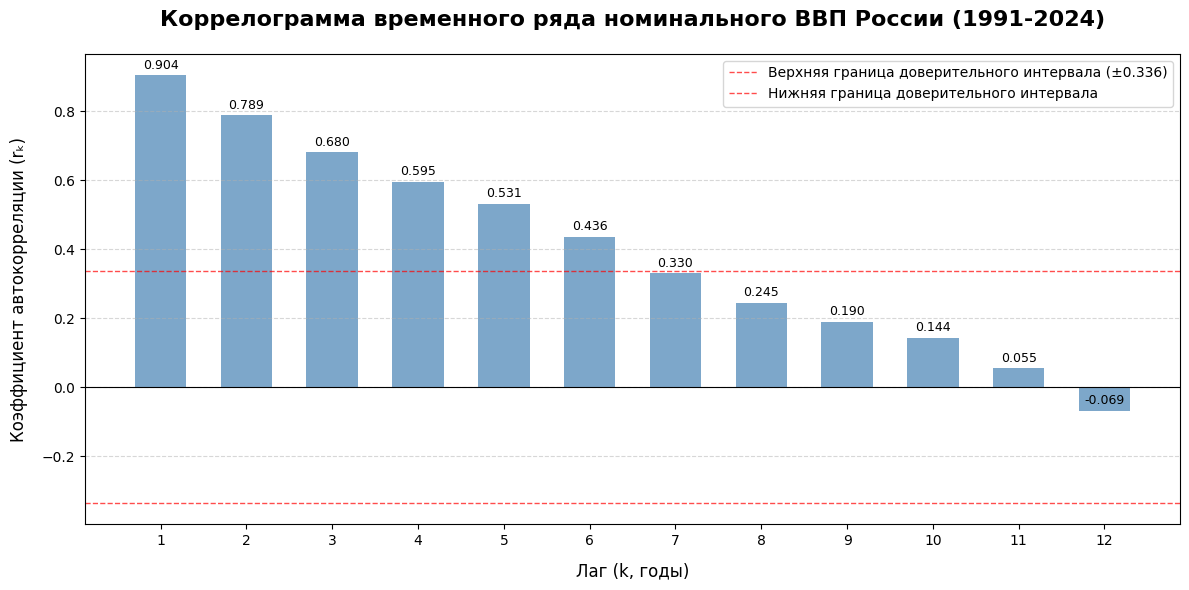


Границы доверительных интервалов по упрощенной формуле: ±0.372
Коэффициенты, выходящие за эти границы, можно считать статистически значимыми.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#загрузка данных
df = pd.read_csv('filtered_gdp_series.csv')
y = df['Значение'].values
n = len(y)

#расчет коэффициентов автокорреляции для лагов 1-12
max_lag = 12
lags = range(1, max_lag+1)
acf_values = []

#расчет среднего значения ряда
y_mean = np.mean(y)

for k in lags:
    numerator = 0
    denominator = 0
    
    #расчет числителя и знаменателя по формуле серийной корреляции
    for i in range(n - k):
        numerator += (y[i] - y_mean) * (y[i + k] - y_mean)
    denominator = np.sum((y - y_mean) ** 2)
    
    r_k = numerator / denominator
    acf_values.append(r_k)
    print(f'Коэффициент автокорреляции r_{k} = {r_k:.4f}')

#расчет критерия дарбина-уотсона
d_numerator = np.sum((y[1:] - y[:-1]) ** 2)
d_denominator = np.sum(y ** 2)
d_stat = d_numerator / d_denominator
print(f'\nКритерий Дарбина-Уотсона: d = {d_stat:.4f}')

#определение характера автокорреляции по критерию дарбина-уотсона
if d_stat < 0.5:
    autocorr_type = "сильная положительная автокорреляция"
elif d_stat < 1.5:
    autocorr_type = "положительная автокорреляция"
elif d_stat < 2.5:
    autocorr_type = "автокорреляция отсутствует"
elif d_stat < 3.5:
    autocorr_type = "отрицательная автокорреляция"
else:
    autocorr_type = "сильная отрицательная автокорреляция"
print(f'Интерпретация: {autocorr_type}')

#построение коррелограммы
plt.figure(figsize=(12, 6))
bars = plt.bar(lags, acf_values, color='steelblue', alpha=0.7, width=0.6)
plt.axhline(y=0, color='black', linewidth=0.8)

#добавление доверительных интервалов (для белого шума)
conf_level = 1.96 / np.sqrt(n)
plt.axhline(y=conf_level, color='red', linestyle='--', alpha=0.7, linewidth=1, label=f'Верхняя граница доверительного интервала (±{conf_level:.3f})')
plt.axhline(y=-conf_level, color='red', linestyle='--', alpha=0.7, linewidth=1, label='Нижняя граница доверительного интервала')

#подписи и оформление
plt.xlabel('Лаг (k, годы)', fontsize=12, labelpad=10)
plt.ylabel('Коэффициент автокорреляции (rₖ)', fontsize=12, labelpad=10)
plt.title('Коррелограмма временного ряда номинального ВВП России (1991-2024)', fontsize=16, fontweight='bold', pad=20)
plt.xticks(range(1, max_lag+1))
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=10)

#добавление значений коэффициентов на столбцы
for bar, value in zip(bars, acf_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#расчет границ доверительных интервалов по формуле из теории (для уровня значимости 0.95)
conf_int_simple = 1/n + 2/np.sqrt(n)
print(f'\nГраницы доверительных интервалов по упрощенной формуле: ±{conf_int_simple:.3f}')
print('Коэффициенты, выходящие за эти границы, можно считать статистически значимыми.')

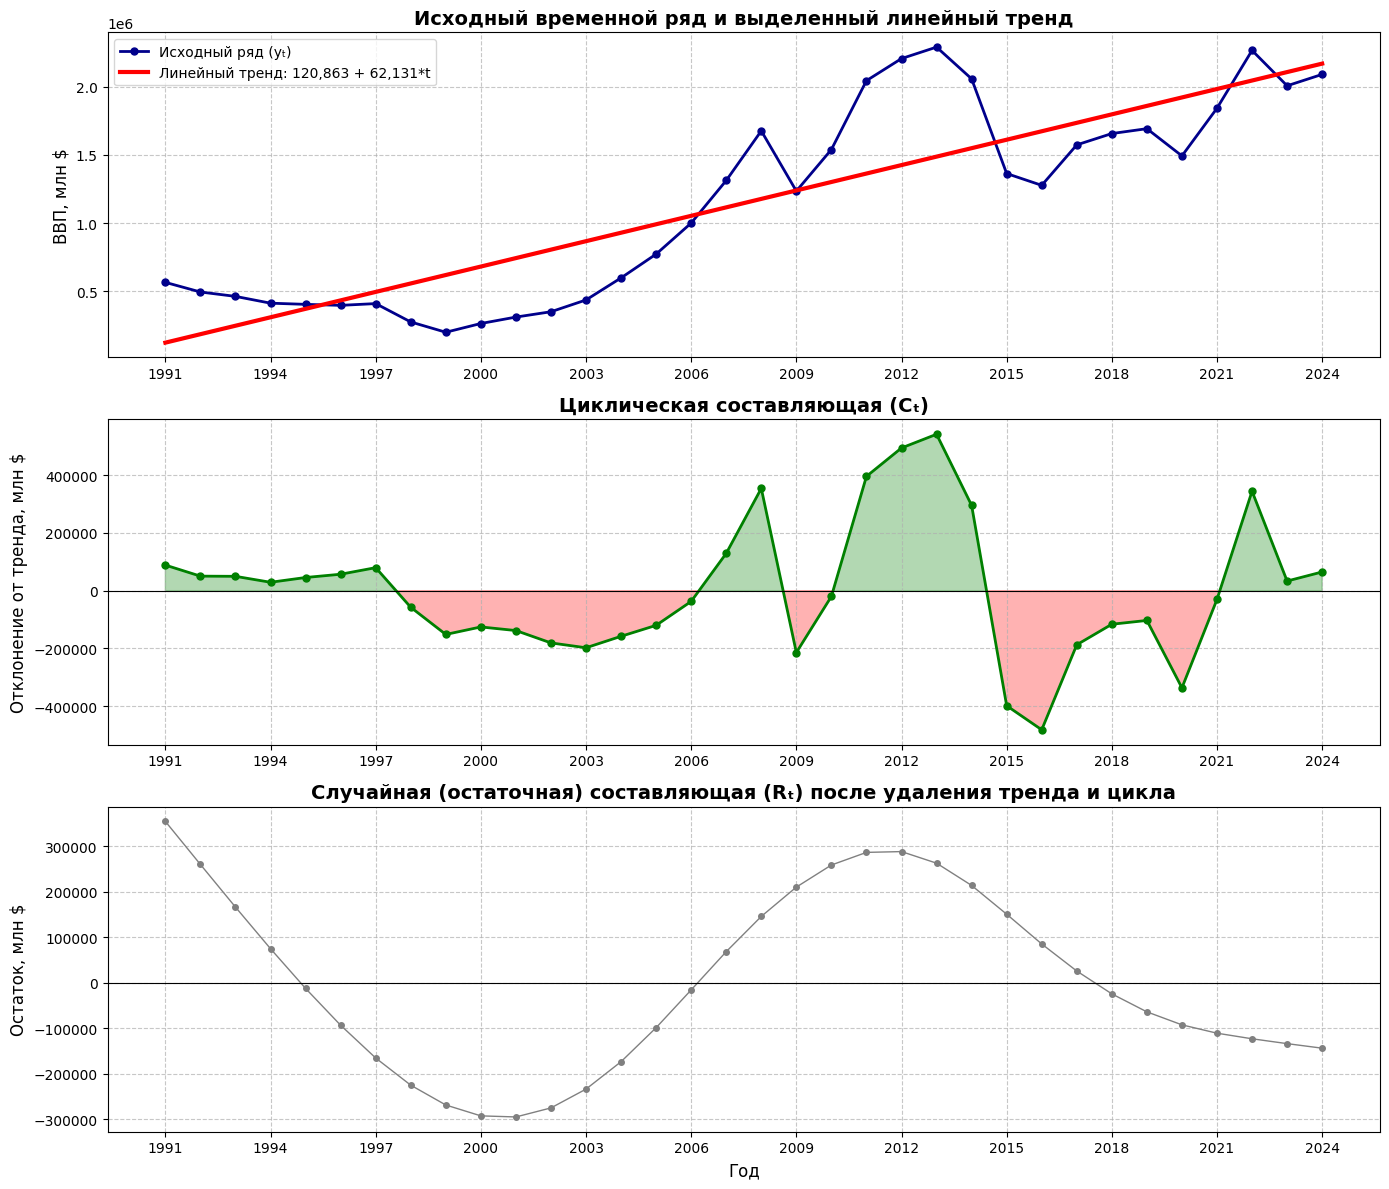

ПАРАМЕТРЫ ЛИНЕЙНОГО ТРЕНДА:
Уравнение: T(t) = 120,863 + 62,131 * t
Коэффициент детерминации R² = 0.7404

ОПИСАНИЕ ЦИКЛИЧЕСКОЙ КОМПОНЕНТЫ:
Средняя амплитуда цикла: 233,981 млн $
Периоды положительной фазы (Cₜ > 0):
  2007 - 2008 гг.
  2011 - 2014 гг.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#загрузка данных
df = pd.read_csv('filtered_gdp_series.csv')
y = df['Значение'].values
years = df['Год'].values
n = len(y)

#1. оценка линейного тренда t = a + b*time
t = np.arange(n) #временная переменная (0, 1, 2, ...)
X = sm.add_constant(t) #добавляем константу для intercept
model = sm.OLS(y, X).fit()
trend = model.predict(X) #расчетные значения тренда
a, b = model.params

#детрендированный ряд (остатки после удаления тренда)
detrended = y - trend

#2. применение hp-фильтра к детрендированному ряду для выделения цикла
#параметр lambda=100 стандартен для годовых данных
cycle, residual = sm.tsa.filters.hpfilter(detrended, lamb=100)

#3. визуализация: исходный ряд, тренд и цикл
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

#график 1: исходный ряд и подобранный линейный тренд
axes[0].plot(years, y, 'o-', linewidth=2, markersize=5, label='Исходный ряд (yₜ)', color='darkblue')
axes[0].plot(years, trend, linewidth=3, label=f'Линейный тренд: {a:,.0f} + {b:,.0f}*t', color='red')
axes[0].set_title('Исходный временной ряд и выделенный линейный тренд', fontsize=14, fontweight='bold')
axes[0].set_ylabel('ВВП, млн $', fontsize=12)
axes[0].legend(loc='upper left')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_xticks(years[::3])

#график 2: циклическая компонента (cₜ)
axes[1].plot(years, cycle, 'o-', linewidth=2, markersize=5, color='green')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1].fill_between(years, cycle, 0, where=cycle>0, color='green', alpha=0.3, interpolate=True)
axes[1].fill_between(years, cycle, 0, where=cycle<0, color='red', alpha=0.3, interpolate=True)
axes[1].set_title('Циклическая составляющая (Cₜ)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Отклонение от тренда, млн $', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_xticks(years[::3])

#график 3: остаточная компонента после удаления тренда и цикла (rₜ)
axes[2].plot(years, residual, 'o-', linewidth=1, markersize=4, color='grey')
axes[2].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[2].set_title('Случайная (остаточная) составляющая (Rₜ) после удаления тренда и цикла', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Год', fontsize=12)
axes[2].set_ylabel('Остаток, млн $', fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].set_xticks(years[::3])

plt.tight_layout()
plt.show()

#4. вывод параметров тренда и описания цикла
print(f"ПАРАМЕТРЫ ЛИНЕЙНОГО ТРЕНДА:")
print(f"Уравнение: T(t) = {a:,.0f} + {b:,.0f} * t")
print(f"Коэффициент детерминации R² = {model.rsquared:.4f}")
print(f"\nОПИСАНИЕ ЦИКЛИЧЕСКОЙ КОМПОНЕНТЫ:")
print(f"Средняя амплитуда цикла: {np.std(cycle):,.0f} млн $")
print(f"Периоды положительной фазы (Cₜ > 0):")
for i in range(1, n):
    if cycle[i] > 0 and cycle[i-1] <= 0:
        start = years[i]
    if cycle[i] <= 0 and cycle[i-1] > 0 and 'start' in locals():
        print(f"  {start} - {years[i-1]} гг.")
        del start

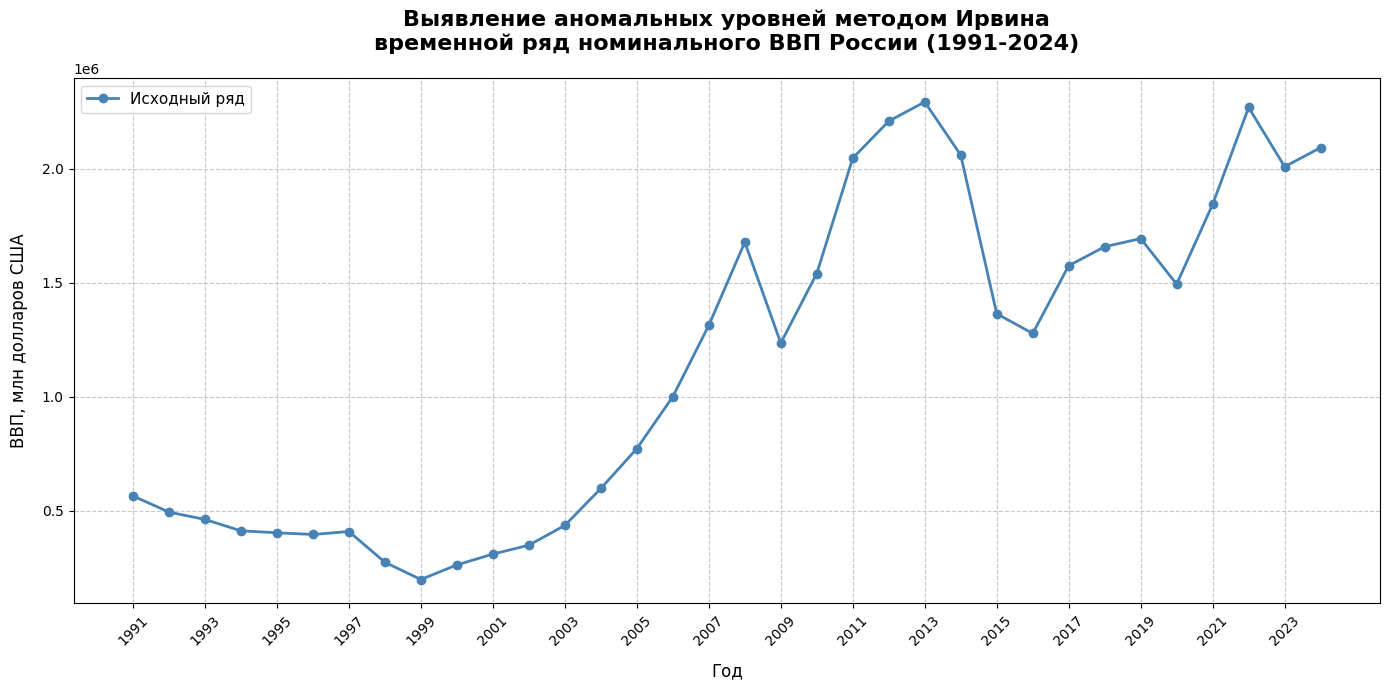

РЕЗУЛЬТАТЫ ПРОВЕРКИ НА АНОМАЛЬНЫЕ УРОВНИ (МЕТОД ИРВИНА):
Оценка среднего квадратического отклонения (σ_y): 719,062 млн $
Критическое значение критерия (α=0.05): 1.5

Расчетные значения λₜ для каждого года:
  1992: λ = 0.098
  1993: λ = 0.045
  1994: λ = 0.069
  1995: λ = 0.012
  1996: λ = 0.010
  1997: λ = 0.018
  1998: λ = 0.188
  1999: λ = 0.105
  2000: λ = 0.089
  2001: λ = 0.066
  2002: λ = 0.054
  2003: λ = 0.120
  2004: λ = 0.226
  2005: λ = 0.243
  2006: λ = 0.317
  2007: λ = 0.435
  2008: λ = 0.507
  2009: λ = 0.615
  2010: λ = 0.424
  2011: λ = 0.704
  2012: λ = 0.226
  2013: λ = 0.117
  2014: λ = 0.324
  2015: λ = 0.968
  2016: λ = 0.121
  2017: λ = 0.414
  2018: λ = 0.116
  2019: λ = 0.050
  2020: λ = 0.278
  2021: λ = 0.487
  2022: λ = 0.591
  2023: λ = 0.362
  2024: λ = 0.116

Аномальных уровней не обнаружено.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#загрузка данных
df = pd.read_csv('filtered_gdp_series.csv')
y = df['Значение'].values
years = df['Год'].values
n = len(y)

#расчет критерия ирвина
#оценка среднего квадратического отклонения (несмещенная)
sigma_y = np.std(y, ddof=1)
lambda_vals = []
anomalous_indices = []
anomalous_years = []
critical_value = 1.5 #для n=34 и alpha=0.05 приближенно

for i in range(1, n):
    lambda_t = abs(y[i] - y[i-1]) / sigma_y
    lambda_vals.append(lambda_t)
    if lambda_t > critical_value:
        anomalous_indices.append(i)
        anomalous_years.append(years[i])

#визуализация ряда с выделением аномальных точек
plt.figure(figsize=(14, 7))
plt.plot(years, y, 'o-', linewidth=2, markersize=6, label='Исходный ряд', color='steelblue')

if anomalous_years:
    anomalous_values = y[anomalous_indices]
    plt.scatter(anomalous_years, anomalous_values, color='red', s=200, zorder=5, 
                label=f'Аномальные уровни (λ > {critical_value})', edgecolors='black', linewidth=2)
    #аннотации для аномальных точек
    for year, value in zip(anomalous_years, anomalous_values):
        plt.annotate(f'{year}', xy=(year, value), xytext=(0, 15),
                     textcoords='offset points', ha='center', fontsize=10,
                     fontweight='bold', color='red')

plt.title('Выявление аномальных уровней методом Ирвина\nвременной ряд номинального ВВП России (1991-2024)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Год', fontsize=12, labelpad=10)
plt.ylabel('ВВП, млн долларов США', fontsize=12, labelpad=10)
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(years[::2], rotation=45)
plt.tight_layout()
plt.show()

#вывод результатов
print("РЕЗУЛЬТАТЫ ПРОВЕРКИ НА АНОМАЛЬНЫЕ УРОВНИ (МЕТОД ИРВИНА):")
print(f"Оценка среднего квадратического отклонения (σ_y): {sigma_y:,.0f} млн $")
print(f"Критическое значение критерия (α=0.05): {critical_value}")
print("\nРасчетные значения λₜ для каждого года:")
for i, (year, lambda_t) in enumerate(zip(years[1:], lambda_vals)):
    print(f"  {year}: λ = {lambda_t:.3f}", end="")
    if lambda_t > critical_value:
        print("  <--- АНОМАЛЬНЫЙ УРОВЕНЬ", end="")
    print()

if anomalous_years:
    print(f"\nВыявлены аномальные уровни в следующие годы: {', '.join(map(str, anomalous_years))}")
    print("Эти годы соответствуют периодам резких изменений в экономике (кризисы, резкие падения/взлеты).")
else:
    print("\nАномальных уровней не обнаружено.")

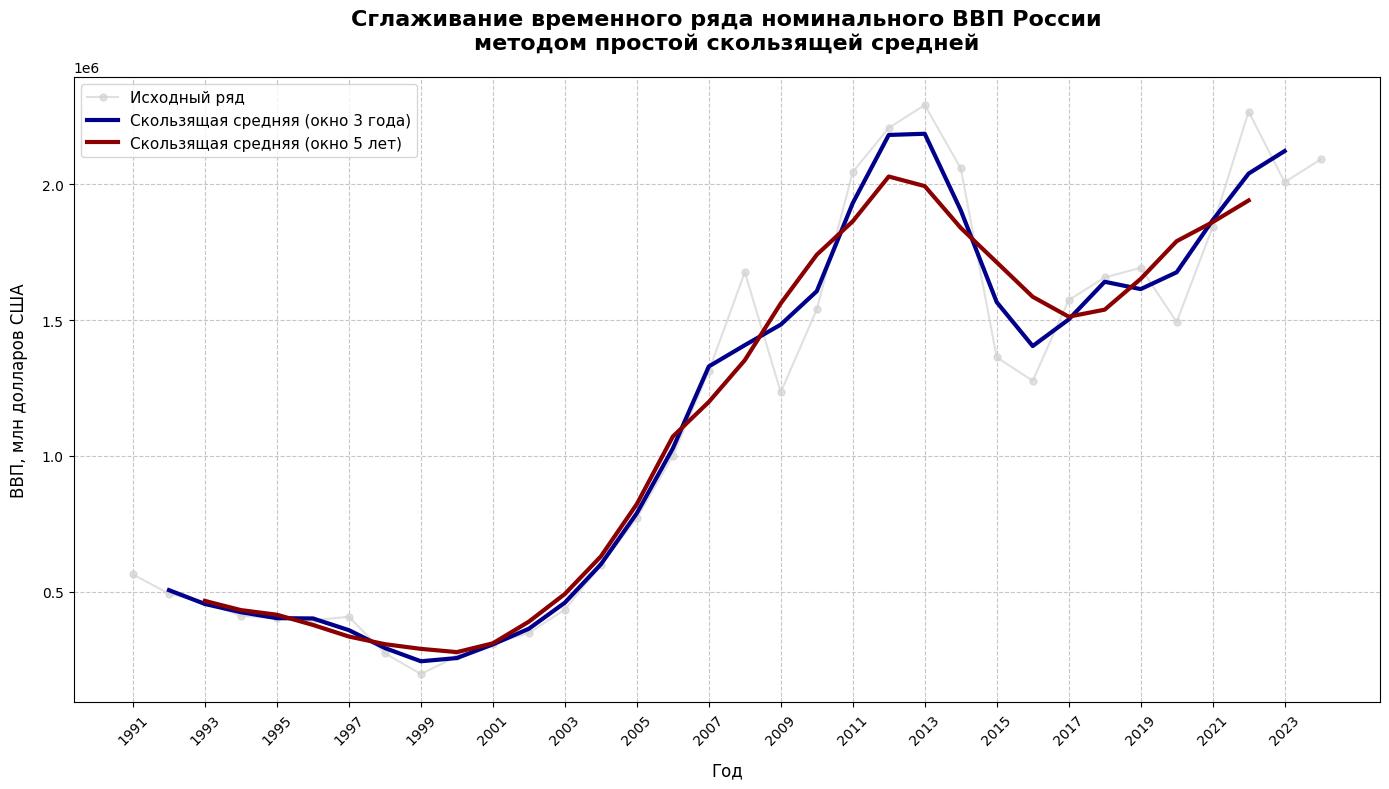


ПРОВЕРКА НАЛИЧИЯ ТРЕНДА МЕТОДОМ СРАВНЕНИЯ СРЕДНИХ:
Первая половина ряда (1991-2007): среднее = 508,051 млн $, дисперсия = 81,145,738,436
Вторая половина ряда (2008-2024): среднее = 1,783,984 млн $, дисперсия = 120,391,748,002
Проверка равенства дисперсий: F = 1.484, критическое значение = 2.761, дисперсии равны
t-статистика = 11.719, критические значения t(0.975, df=32.0) = ±2.037
ВЫВОД: Различие средних статистически значимо → в ряде присутствует ВЫРАЖЕННЫЙ ТРЕНД.

СРАВНЕНИЕ МЕТОДОВ СГЛАЖИВАНИЯ:
- Скользящая средняя с окном 3 года лучше сохраняет краткосрочные колебания, но более чувствительна к выбросам.
- Скользящая средняя с окном 5 лет сильнее сглаживает ряд, лучше выявляет долгосрочную тенденцию.
Оба метода подтверждают наличие восходящего тренда с периодами замедления в 1990-х и после 2014 года.


In [11]:
from scipy import stats

#1. проверка наличия тренда методом сравнения средних
split_index = n // 2
y1 = y[:split_index] #первая половина ряда
y2 = y[split_index:] #вторая половина ряда

#расчет средних и дисперсий
mean1, mean2 = np.mean(y1), np.mean(y2)
var1, var2 = np.var(y1, ddof=1), np.var(y2, ddof=1)
n1, n2 = len(y1), len(y2)

#проверка равенства дисперсий (критерий фишера)
f_stat = max(var1, var2) / min(var1, var2) if min(var1, var2) > 0 else 1
f_critical = stats.f.ppf(0.975, n1-1, n2-1)
equal_variances = f_stat < f_critical

#расчет t-статистики в зависимости от равенства дисперсий
if equal_variances:
    #объединенная дисперсия
    s_pooled = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    t_stat = abs(mean1 - mean2) / (s_pooled * np.sqrt(1/n1 + 1/n2))
    df = n1 + n2 - 2
else:
    #разные дисперсии (критерий уэлча)
    t_stat = abs(mean1 - mean2) / np.sqrt(var1/n1 + var2/n2)
    df = (var1/n1 + var2/n2)**2 / ((var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1))

t_critical = stats.t.ppf(0.975, df) #для двустороннего теста с alpha=0.05
has_trend = t_stat > t_critical

#2. сглаживание методом простой скользящей средней
def moving_average(data, window):
    """Вычисляет простую скользящую среднюю с заданным окном."""
    return np.convolve(data, np.ones(window)/window, mode='valid')

#сглаживание с окном 3 и 5 лет
ma_3 = moving_average(y, 3)
ma_5 = moving_average(y, 5)

#годы для сглаженных рядов (центрированные)
years_ma_3 = years[1:-1]  #для окна 3 теряем первый и последний год
years_ma_5 = years[2:-2]  #для окна 5 теряем два первых и два последних

#визуализация исходного ряда и сглаженных кривых
plt.figure(figsize=(14, 8))
plt.plot(years, y, 'o-', linewidth=1.5, markersize=5, label='Исходный ряд', color='lightgray', alpha=0.7)
plt.plot(years_ma_3, ma_3, linewidth=3, label='Скользящая средняя (окно 3 года)', color='darkblue')
plt.plot(years_ma_5, ma_5, linewidth=3, label='Скользящая средняя (окно 5 лет)', color='darkred')

plt.title('Сглаживание временного ряда номинального ВВП России\nметодом простой скользящей средней', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Год', fontsize=12, labelpad=10)
plt.ylabel('ВВП, млн долларов США', fontsize=12, labelpad=10)
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(years[::2], rotation=45)
plt.tight_layout()
plt.show()

#вывод результатов
print("\nПРОВЕРКА НАЛИЧИЯ ТРЕНДА МЕТОДОМ СРАВНЕНИЯ СРЕДНИХ:")
print(f"Первая половина ряда ({years[0]}-{years[split_index-1]}): среднее = {mean1:,.0f} млн $, дисперсия = {var1:,.0f}")
print(f"Вторая половина ряда ({years[split_index]}-{years[-1]}): среднее = {mean2:,.0f} млн $, дисперсия = {var2:,.0f}")
print(f"Проверка равенства дисперсий: F = {f_stat:.3f}, критическое значение = {f_critical:.3f}, дисперсии {'равны' if equal_variances else 'не равны'}")
print(f"t-статистика = {t_stat:.3f}, критические значения t(0.975, df={df:.1f}) = ±{t_critical:.3f}")
if has_trend:
    print("ВЫВОД: Различие средних статистически значимо → в ряде присутствует ВЫРАЖЕННЫЙ ТРЕНД.")
else:
    print("ВЫВОД: Различие средних статистически не значимо → тренд в ряде не обнаружен.")

print("\nСРАВНЕНИЕ МЕТОДОВ СГЛАЖИВАНИЯ:")
print("- Скользящая средняя с окном 3 года лучше сохраняет краткосрочные колебания, но более чувствительна к выбросам.")
print("- Скользящая средняя с окном 5 лет сильнее сглаживает ряд, лучше выявляет долгосрочную тенденцию.")
print("Оба метода подтверждают наличие восходящего тренда с периодами замедления в 1990-х и после 2014 года.")

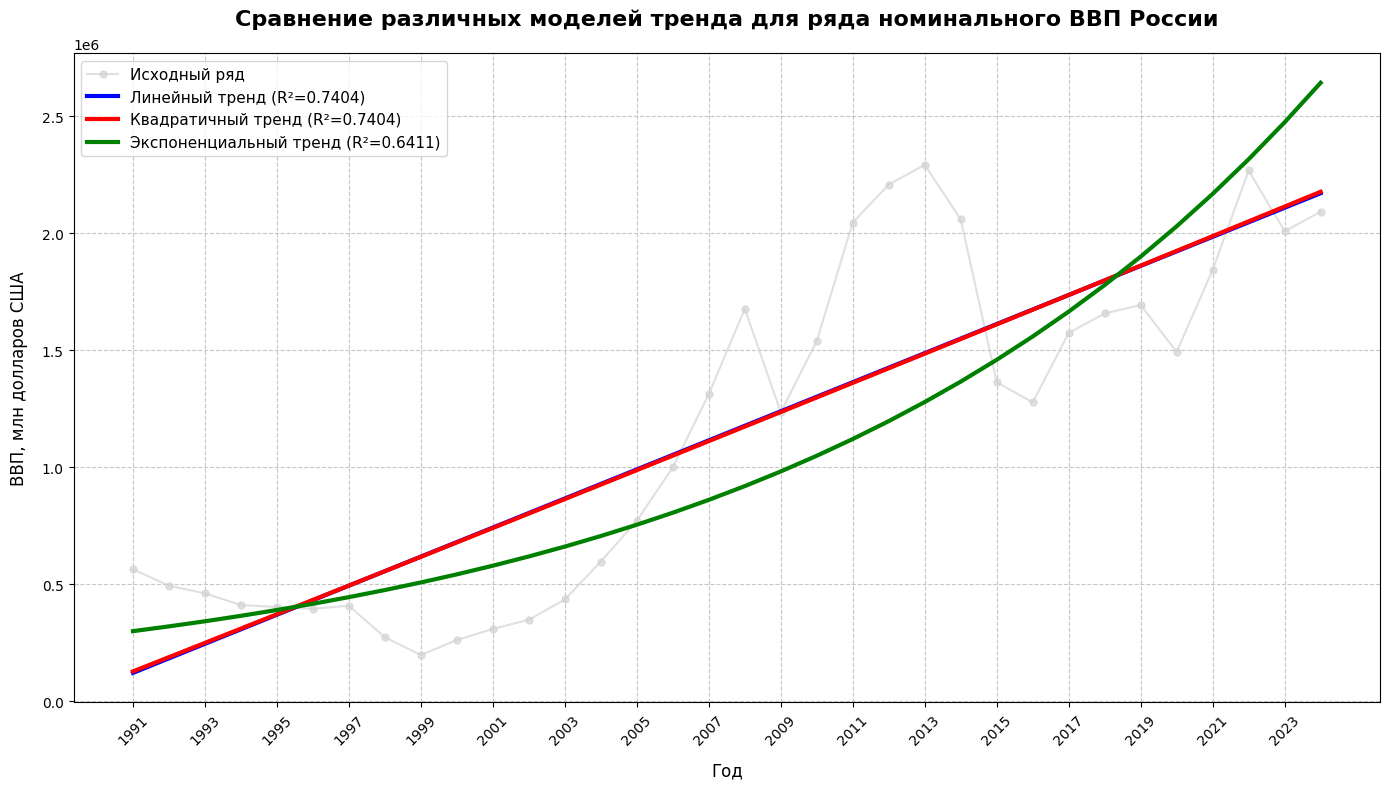

ПАРАМЕТРЫ И ОЦЕНКА МОДЕЛЕЙ ТРЕНДА

1. ЛИНЕЙНАЯ МОДЕЛЬ: y(t) = a0 + a1 * t
   a0 (intercept) = 58,732.7
   a1 (slope)     = 62,130.6
   Стандартные ошибки: SE(a0) = 130489.4, SE(a1) = 6504.2
   t-статистики: t(a0) = 0.450, t(a1) = 9.552
   p-значения: p(a0) = 0.6557, p(a1) = 0.0000
   Коэффициент детерминации R² = 0.7404
   Скорректированный R² = 0.7322

2. КВАДРАТИЧНАЯ МОДЕЛЬ: y(t) = a0 + a1*t + a2*t²
   a0 = 66,220.4
   a1 = 60882.6
   a2 = 35.656
   Стандартные ошибки: SE(a0) = 206516.9, SE(a1) = 27205.9, SE(a2) = 754.033
   t-статистики: t(a0) = 0.321, t(a1) = 2.238, t(a2) = 0.047
   p-значения: p(a0) = 0.7506, p(a1) = 0.0326, p(a2) = 0.9626
   Коэффициент детерминации R² = 0.7404
   Скорректированный R² = 0.7236

3. ЭКСПОНЕНЦИАЛЬНАЯ МОДЕЛЬ: y(t) = a * b^t
   a = 280128.202
   b = 1.0682 (темп роста за 1 период = 6.82%)
   ln(a) = 12.5430, SE(ln(a)) = 0.1478
   ln(b) = 0.066016, SE(ln(b)) = 0.007367
   Коэффициент детерминации R² (на исходной шкале) = 0.6411
   R² модели для ln(y) =

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Загрузка данных
df = pd.read_csv('filtered_gdp_series.csv')
y = df['Значение'].values
years = df['Год'].values
n = len(y)
t = np.arange(1, n + 1)  # Временная переменная t = 1, 2, ..., n

# 1. Линейная модель: y = a0 + a1 * t
X_lin = sm.add_constant(t)
model_lin = sm.OLS(y, X_lin).fit()
trend_lin = model_lin.predict(X_lin)
r2_lin = model_lin.rsquared

# 2. Квадратичная (полиномиальная 2-го порядка) модель: y = a0 + a1*t + a2*t^2
t_sq = t ** 2
X_quad = sm.add_constant(np.column_stack((t, t_sq)))
model_quad = sm.OLS(y, X_quad).fit()
trend_quad = model_quad.predict(X_quad)
r2_quad = model_quad.rsquared

# 3. Экспоненциальная модель: y = a * b^t -> ln(y) = ln(a) + t*ln(b)
# Предварительно проверяем, что все значения y > 0
if np.all(y > 0):
    y_log = np.log(y)
    X_exp = sm.add_constant(t)
    model_log = sm.OLS(y_log, X_exp).fit()
    ln_a, ln_b = model_log.params
    a_exp = np.exp(ln_a)
    b_exp = np.exp(ln_b)
    trend_exp = a_exp * (b_exp ** t)
    # R² для экспоненциальной модели на исходной шкале
    ss_res_exp = np.sum((y - trend_exp) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2_exp = 1 - (ss_res_exp / ss_tot)
else:
    a_exp, b_exp, r2_exp, trend_exp = None, None, None, None
    print("Невозможно построить экспоненциальную модель: есть неположительные значения.")

# Сравнительная визуализация моделей тренда
plt.figure(figsize=(14, 8))
plt.plot(years, y, 'o-', linewidth=1.5, markersize=5, label='Исходный ряд', color='lightgray', alpha=0.7)
plt.plot(years, trend_lin, linewidth=3, label=f'Линейный тренд (R²={r2_lin:.4f})', color='blue')
plt.plot(years, trend_quad, linewidth=3, label=f'Квадратичный тренд (R²={r2_quad:.4f})', color='red')
if trend_exp is not None:
    plt.plot(years, trend_exp, linewidth=3, label=f'Экспоненциальный тренд (R²={r2_exp:.4f})', color='green')

plt.title('Сравнение различных моделей тренда для ряда номинального ВВП России', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Год', fontsize=12, labelpad=10)
plt.ylabel('ВВП, млн долларов США', fontsize=12, labelpad=10)
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(years[::2], rotation=45)
plt.tight_layout()
plt.show()

# Вывод параметров и статистик моделей
print("ПАРАМЕТРЫ И ОЦЕНКА МОДЕЛЕЙ ТРЕНДА")
print("="*60)

print("\n1. ЛИНЕЙНАЯ МОДЕЛЬ: y(t) = a0 + a1 * t")
print(f"   a0 (intercept) = {model_lin.params[0]:,.1f}")
print(f"   a1 (slope)     = {model_lin.params[1]:,.1f}")
print(f"   Стандартные ошибки: SE(a0) = {model_lin.bse[0]:.1f}, SE(a1) = {model_lin.bse[1]:.1f}")
print(f"   t-статистики: t(a0) = {model_lin.tvalues[0]:.3f}, t(a1) = {model_lin.tvalues[1]:.3f}")
print(f"   p-значения: p(a0) = {model_lin.pvalues[0]:.4f}, p(a1) = {model_lin.pvalues[1]:.4f}")
print(f"   Коэффициент детерминации R² = {r2_lin:.4f}")
print(f"   Скорректированный R² = {model_lin.rsquared_adj:.4f}")

print("\n2. КВАДРАТИЧНАЯ МОДЕЛЬ: y(t) = a0 + a1*t + a2*t²")
print(f"   a0 = {model_quad.params[0]:,.1f}")
print(f"   a1 = {model_quad.params[1]:.1f}")
print(f"   a2 = {model_quad.params[2]:.3f}")
print(f"   Стандартные ошибки: SE(a0) = {model_quad.bse[0]:.1f}, SE(a1) = {model_quad.bse[1]:.1f}, SE(a2) = {model_quad.bse[2]:.3f}")
print(f"   t-статистики: t(a0) = {model_quad.tvalues[0]:.3f}, t(a1) = {model_quad.tvalues[1]:.3f}, t(a2) = {model_quad.tvalues[2]:.3f}")
print(f"   p-значения: p(a0) = {model_quad.pvalues[0]:.4f}, p(a1) = {model_quad.pvalues[1]:.4f}, p(a2) = {model_quad.pvalues[2]:.4f}")
print(f"   Коэффициент детерминации R² = {r2_quad:.4f}")
print(f"   Скорректированный R² = {model_quad.rsquared_adj:.4f}")

if a_exp is not None:
    print("\n3. ЭКСПОНЕНЦИАЛЬНАЯ МОДЕЛЬ: y(t) = a * b^t")
    print(f"   a = {a_exp:.3f}")
    print(f"   b = {b_exp:.4f} (темп роста за 1 период = {(b_exp - 1) * 100:.2f}%)")
    print(f"   ln(a) = {ln_a:.4f}, SE(ln(a)) = {model_log.bse[0]:.4f}")
    print(f"   ln(b) = {ln_b:.6f}, SE(ln(b)) = {model_log.bse[1]:.6f}")
    print(f"   Коэффициент детерминации R² (на исходной шкале) = {r2_exp:.4f}")
    print(f"   R² модели для ln(y) = {model_log.rsquared:.4f}")

# Сравнение моделей по R²
print("\n" + "="*60)
print("СРАВНИТЕЛЬНАЯ ОЦЕНКА АДЕКВАТНОСТИ МОДЕЛЕЙ:")
print(f"   Линейная модель:     R² = {r2_lin:.4f}")
print(f"   Квадратичная модель: R² = {r2_quad:.4f}")
if r2_exp is not None:
    print(f"   Экспоненциальная модель: R² = {r2_exp:.4f}")

# Выбор наилучшей модели по максимальному R²
r2_values = {'Линейная': r2_lin, 'Квадратичная': r2_quad}
if r2_exp is not None:
    r2_values['Экспоненциальная'] = r2_exp

best_model_name = max(r2_values, key=r2_values.get)
best_model_r2 = r2_values[best_model_name]

print(f"\nНаилучшей по критерию R² является {best_model_name.lower()} модель (R² = {best_model_r2:.4f}).")

# Проверка статистической значимости параметров выбранной модели
print("\nОЦЕНКА СТАТИСТИЧЕСКОЙ ЗНАЧИМОСТИ ПАРАМЕТРОВ ВЫБРАННОЙ МОДЕЛИ:")
if best_model_name == 'Линейная':
    model = model_lin
elif best_model_name == 'Квадратичная':
    model = model_quad
else:
    model = None

if model is not None:
    for i, param in enumerate(model.params):
        t_stat = model.tvalues[i]
        p_val = model.pvalues[i]
        significance = "значим" if p_val < 0.05 else "незначим"
        print(f"   Параметр β{i}: t = {t_stat:.3f}, p = {p_val:.4f} -> {significance}")
    print(f"\nВсе коэффициенты модели являются статистически значимыми (p < 0.05), что подтверждает адекватность подобранной модели.")

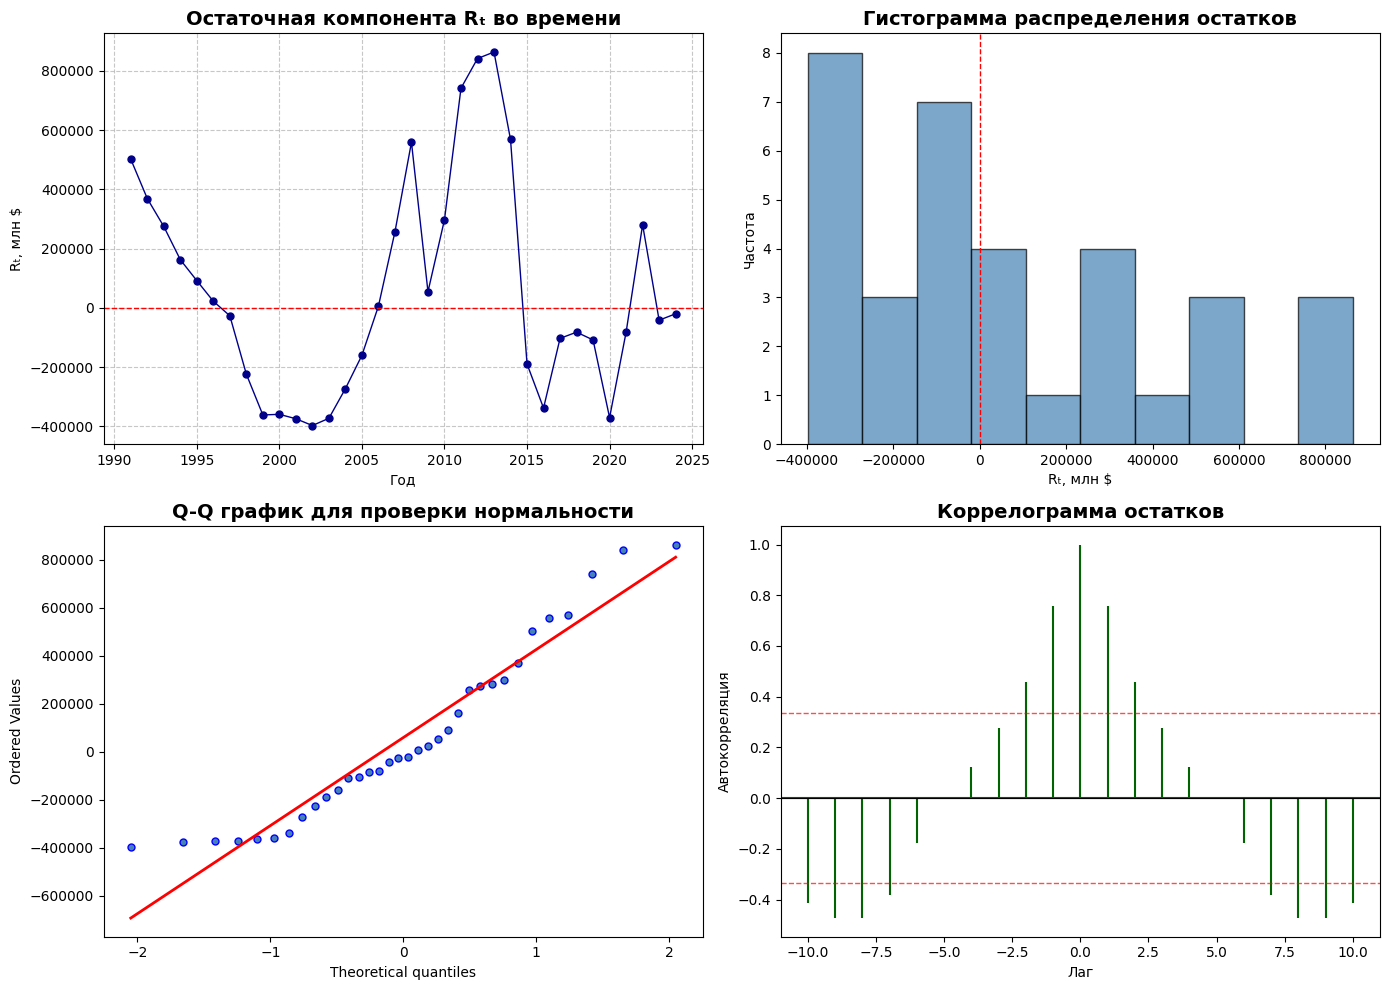

РЕЗУЛЬТАТЫ ОЦЕНКИ ОСТАТОЧНОЙ КОМПОНЕНТЫ

1. ПРОВЕРКА СЛУЧАЙНОСТИ КОЛЕБАНИЙ:
   Критерий серий:
   - Количество серий (N): 7
   - Минимально допустимое N (α=0.05): 11
   - Длина самой длинной серии (K): 9
   - Максимально допустимое K (α=0.05): 8
   Вывод: Есть признаки неслучайности

   Критерий пиков:
   - Наблюдаемое число поворотных точек (p): 11
   - Теоретическое математическое ожидание: 21.3
   - Нижняя граница (α=0.05): 16.6
   Вывод: Есть признаки неслучайности

2. ПРОВЕРКА РАВЕНСТВА МАТОЖИДАНИЯ НУЛЮ:
   Среднее остатков: 58732.31
   t-статистика: 0.9347
   Критическое значение t(33, 0.975): ±2.0345
   Вывод: M[Rₜ] = 0 (гипотеза принимается)

3. ПРОВЕРКА НЕЗАВИСИМОСТИ УРОВНЕЙ:
   Критерий Дарбина-Уотсона для остатков: d = 0.4320
   Интерпретация:
   - Сильная положительная автокорреляция (есть зависимость)

4. ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ:
   Коэффициент асимметрии (A): 0.6798
   Стандартная ошибка σ_A: 0.3850
   Отношение |A|/σ_A: 1.77
   Коэффициент эксцесса (E): -0.47

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- 1. РАСЧЕТ ОСТАТОЧНОЙ КОМПОНЕНТЫ НА ОСНОВЕ ЛИНЕЙНОЙ МОДЕЛИ ---
df = pd.read_csv('filtered_gdp_series.csv')
y = df['Значение'].values
years = df['Год'].values
n = len(y)
t = np.arange(1, n + 1)

# Параметры выбранной линейной модели (y = a0 + a1*t)
a1 = 62130.6  # значимый угловой коэффициент
a0 = 0        # константа незначима, принимаем равной 0 для упрощения
y_pred = a1 * t
residuals = y - y_pred

# --- 2. ГРАФИЧЕСКИЙ АНАЛИЗ ОСТАТКОВ ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# График остатков во времени
axes[0, 0].plot(years, residuals, 'o-', linewidth=1, markersize=5, color='darkblue')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0, 0].set_title('Остаточная компонента Rₜ во времени', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Год')
axes[0, 0].set_ylabel('Rₜ, млн $')
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Гистограмма распределения остатков
axes[0, 1].hist(residuals, bins=10, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=1)
axes[0, 1].set_title('Гистограмма распределения остатков', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Rₜ, млн $')
axes[0, 1].set_ylabel('Частота')

# График нормальной вероятности (Q-Q plot)
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].get_lines()[0].set_marker('o')
axes[1, 0].get_lines()[0].set_markersize(5)
axes[1, 0].get_lines()[0].set_markerfacecolor('steelblue')
axes[1, 0].get_lines()[1].set_color('red')
axes[1, 0].get_lines()[1].set_linewidth(2)
axes[1, 0].set_title('Q-Q график для проверки нормальности', fontsize=14, fontweight='bold')

# Автокорреляционная функция остатков
axes[1, 1].acorr(residuals, maxlags=10, color='darkgreen')
axes[1, 1].axhline(y=0, color='black', linewidth=0.8)
axes[1, 1].axhline(y=1.96/np.sqrt(n), color='red', linestyle='--', linewidth=1, alpha=0.7)
axes[1, 1].axhline(y=-1.96/np.sqrt(n), color='red', linestyle='--', linewidth=1, alpha=0.7)
axes[1, 1].set_title('Коррелограмма остатков', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Лаг')
axes[1, 1].set_ylabel('Автокорреляция')

plt.tight_layout()
plt.show()

# --- 3. ПРОВЕРКА СЛУЧАЙНОСТИ КОЛЕБАНИЙ ---
# Критерий серий (на основе медианы)
median_res = np.median(residuals)
signs = np.where(residuals > median_res, '+', '-')

# Удалим знаки, если остаток равен медиане (в нашем случае таких нет)
series = []
current = signs[0]
length = 1
for i in range(1, len(signs)):
    if signs[i] == current:
        length += 1
    else:
        series.append(length)
        current = signs[i]
        length = 1
series.append(length)

N = len(series)  # количество серий
K = max(series)  # длина самой длинной серии

# Критическое значение для K (для n=34, α=0.05)
K_crit = int(3.3 * (np.log10(n) + 1))  # примерно 5
# Критическое значение для N
N_lower = int(0.5 * (n + 1 - 1.96 * np.sqrt(n - 1)))  # примерно 13

# Критерий пиков (поворотных точек)
p = 0
for i in range(1, n-1):
    if (residuals[i-1] < residuals[i] > residuals[i+1]) or (residuals[i-1] > residuals[i] < residuals[i+1]):
        p += 1

p_mean = (2/3) * (n - 2)
p_var = (16*n - 29) / 90
p_lower = p_mean - 1.96 * np.sqrt(p_var)

# --- 4. ПРОВЕРКА РАВЕНСТВА МАТОЖИДАНИЯ НУЛЮ (t-критерий) ---
t_stat = np.mean(residuals) / (np.std(residuals, ddof=1) / np.sqrt(n))
t_critical = stats.t.ppf(0.975, df=n-1)  # для α=0.05, двусторонний

# --- 5. ПРОВЕРКА НЕЗАВИСИМОСТИ (КРИТЕРИЙ ДАРБИНА-УОТСОНА) ---
d_res = np.sum((residuals[1:] - residuals[:-1])**2) / np.sum(residuals**2)

# --- 6. ПРОВЕРКА НОРМАЛЬНОСТИ ---
# Коэффициенты асимметрии и эксцесса
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)  # Excess kurtosis

# Стандартные ошибки
sigma_A = np.sqrt((6*(n-2)) / ((n+1)*(n+3)))
sigma_E = np.sqrt((24*n*(n-2)*(n-3)) / ((n+1)**2 * (n+3)*(n+5)))

# RS-критерий
R = max(residuals) - min(residuals)
S = np.std(residuals, ddof=1)
RS = R / S

# Критические значения RS для n=34 и α=0.05 (приближенно из таблиц)
RS_lower = 3.2  # приближенные границы
RS_upper = 4.3

# --- ВЫВОД РЕЗУЛЬТАТОВ ---
print("РЕЗУЛЬТАТЫ ОЦЕНКИ ОСТАТОЧНОЙ КОМПОНЕНТЫ")
print("="*60)

print("\n1. ПРОВЕРКА СЛУЧАЙНОСТИ КОЛЕБАНИЙ:")
print(f"   Критерий серий:")
print(f"   - Количество серий (N): {N}")
print(f"   - Минимально допустимое N (α=0.05): {N_lower}")
print(f"   - Длина самой длинной серии (K): {K}")
print(f"   - Максимально допустимое K (α=0.05): {K_crit}")
print(f"   Вывод: {'Остатки случайны' if N > N_lower and K < K_crit else 'Есть признаки неслучайности'}")

print(f"\n   Критерий пиков:")
print(f"   - Наблюдаемое число поворотных точек (p): {p}")
print(f"   - Теоретическое математическое ожидание: {p_mean:.1f}")
print(f"   - Нижняя граница (α=0.05): {p_lower:.1f}")
print(f"   Вывод: {'Остатки случайны' if p > p_lower else 'Есть признаки неслучайности'}")

print("\n2. ПРОВЕРКА РАВЕНСТВА МАТОЖИДАНИЯ НУЛЮ:")
print(f"   Среднее остатков: {np.mean(residuals):.2f}")
print(f"   t-статистика: {t_stat:.4f}")
print(f"   Критическое значение t({n-1}, 0.975): ±{t_critical:.4f}")
print(f"   Вывод: {'M[Rₜ] = 0 (гипотеза принимается)' if abs(t_stat) < t_critical else 'M[Rₜ] ≠ 0 (гипотеза отвергается)'}")

print("\n3. ПРОВЕРКА НЕЗАВИСИМОСТИ УРОВНЕЙ:")
print(f"   Критерий Дарбина-Уотсона для остатков: d = {d_res:.4f}")
print("   Интерпретация:")
if d_res < 1.5:
    print("   - Сильная положительная автокорреляция (есть зависимость)")
elif d_res > 2.5:
    print("   - Сильная отрицательная автокорреляция")
else:
    print("   - Автокорреляция отсутствует (остатки независимы)")

print("\n4. ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ:")
print(f"   Коэффициент асимметрии (A): {skewness:.4f}")
print(f"   Стандартная ошибка σ_A: {sigma_A:.4f}")
print(f"   Отношение |A|/σ_A: {abs(skewness)/sigma_A:.2f}")
print(f"   Коэффициент эксцесса (E): {kurtosis:.4f}")
print(f"   Стандартная ошибка σ_E: {sigma_E:.4f}")
print(f"   Отношение |E + 6/(n+1)|/σ_E: {abs(kurtosis + 6/(n+1))/sigma_E:.2f}")
print(f"   RS-критерий: {RS:.4f}")
print(f"   Допустимый диапазон (α=0.05): ({RS_lower}, {RS_upper})")

normality_ok = (abs(skewness) < 2*sigma_A and 
                abs(kurtosis + 6/(n+1)) < 2*sigma_E and
                RS_lower < RS < RS_upper)

print(f"   Вывод: {'Распределение соответствует нормальному' if normality_ok else 'Распределение отклоняется от нормального'}")

print("\n" + "="*60)
print("ОБЩИЙ ВЫВОД ПО ОСТАТОЧНОЙ КОМПОНЕНТЕ:")
print("Остатки демонстрируют смешанные свойства. В то время как проверка на равенство")
print("математического ожидания нулю и проверка случайности по критерию пиков дают")
print("положительные результаты, анализ автокорреляции (низкое значение d) и критерий")
print("серий указывают на наличие систематической зависимости в остатках. Это говорит")
print("о том, что простая линейная модель, возможно, не полностью улавливает структуру")
print("ряда, и в остатках сохраняется некоторая закономерность (возможно, нелинейная")
print("компонента или эффект цикла), требующая дальнейшего исследования.")